# Data Analysis jobs.ch & itjobs.ch
data from 8.1.2025

In [33]:
import pandas as pd
import json
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt


In [34]:
parent_dir = os.getcwd()

file_path = os.path.join(parent_dir, '..', 'data', 'jobs_processed.json')

with open(file_path, 'r') as file:
    jobs = json.load(file)

df = pd.DataFrame(jobs)

df.head()

,company,contract_type,descriptions,downloaded,job_title,language,place_of_work,publication_date,rating,reviewed,...,career_stage_cleaned,canton,programming_languages,frameworks,tools,operating_systems,years,education,job_title_cleaned,job_category
0,None,None,[],True,Bauingenieur*in (60-100%) Bereich Konstruktive...,None,None,None,NaN,NaN,...,None,None,[],[],[],[],[],[],NaN,NaN
1,BBT Software AG,None,[{'1': []}],True,IT System Engineer,None,Root D4,06 February 2025,NaN,NaN,...,None,None,[],[],[],[],[],[],System Engineer,Cloud/System Engineer
2,VAT Vakuumventile AG,None,[],True,Development Engineer Motion,None,None,None,NaN,NaN,...,None,None,[],[],[],[],[],[],NaN,NaN
3,Sentec AG,Unlimited employment,[{'0': ['System development of a medical devic...,True,Research Engineer,None,"Ringstrasse 39, 4106 Therwil",07 February 2025,NaN,NaN,...,None,None,"[MATLAB, Python]",[],[],[],[],[PhD],Research Engineer,Software Engineer
4,Implenia Schweiz AG,None,[],True,Responsable agence FS Vétroz,None,None,None,NaN,NaN,...,None,None,[],[],[],[],[],[],NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   company                3013 non-null   object 
 1   contract_type          1267 non-null   object 
 2   descriptions           3936 non-null   object 
 3   downloaded             3936 non-null   bool   
 4   job_title              3936 non-null   object 
 5   language               1023 non-null   object 
 6   place_of_work          1859 non-null   object 
 7   publication_date       1852 non-null   object 
 8   rating                 284 non-null    float64
 9   reviewed               284 non-null    float64
 10  salary                 121 non-null    object 
 11  search_query           3936 non-null   object 
 12  url                    3936 non-null   object 
 13  website                1411 non-null   object 
 14  workload               1294 non-null   object 
 15  care

In [36]:
# data cleaning
df['publication_date'] = pd.to_datetime(df['publication_date'] , format='mixed')
df["years"] = df["years"].apply(lambda x: [i for i in x if i <20]) # filter experience larger than 20 out
df["max_years"] = df["years"].apply(lambda x: max(x) if x else 0)
df["career_stage_cleaned"] = df["career_stage_cleaned"].apply(lambda x: x if x else "Not Explicit")


In [37]:

for i in df['job_title'][df['job_title_cleaned'].isnull()]:
    print(i)


Bauingenieur*in (60-100%) Bereich Konstruktiver Wasserbau
Development Engineer Motion
Responsable agence FS Vétroz
2 PhD student positions in environmental soil chemistry (m/f/d)
Wirtschaftsinformatikerin / Wirtschaftsinformatiker
Managing Director ETH Zurich | Space
IT Operations Manager (w/m/d)
Jurist:in Baurecht / Mandatsleitung 60-100%
Solution Architect:in 80–100 %
Quality Engineer
217 .NET C# E ntwickler
Data-Engineer/Data-Architect, 80–100 % (w/m/d)
ProjektleiterIn in Schaffhausen
2 PhD Positions in Spine Biomechanics
Responsable du Service Bâtiments et Infrastructures
Netzelektriker, Montage-Elektriker, Automatiker oder Polymechaniker (m/w/d) in Niedergösgen
Business Architekt/-in 80 - 100%
Responsable Qualité & Développement produits (h/f)
IT Security Spezialist/-in 100%
Customer Support Engineer - Mexico, Brazil
PIMCORE DEVELOPER:IN PHP/Symfony 70-100% (m/w/d)
Sales Engineer / Sales Manager
Vulnerability Manager
Abteilungsleiter/in Messtechnik-QS 100 %
DevOps
Project Manager 

In [38]:
df["workload"].value_counts()

workload
80 – 100%    650
100%         531
60 – 100%     50
40 – 100%     13
50 – 100%      8
80%            7
70 – 100%      6
60 – 80%       5
60%            4
50%            3
40 – 60%       3
90 – 100%      2
20 – 40%       2
30%            1
50 – 70%       1
5%             1
90%            1
50 – 60%       1
20%            1
60 – 70%       1
20 – 100%      1
40%            1
40 – 50%       1
Name: count, dtype: int64

In [39]:
df.sort_values('rating', ascending=False)[["rating", "company", "job_title", "publication_date", "job_title_cleaned"]].head(30)

,rating,company,job_title,publication_date,job_title_cleaned
2366,8.0,yellowshark,Software-Developer (ETH/Uni) 80-100%,2025-02-11,Software-Developer
884,8.0,Consult & Pepper AG,(Junior) Software Engineer C#/.NET (80 – 100%)...,2025-02-13,Software Engineer
2441,8.0,United Security Providers AG,UI/UX Developer/Engineer,2025-02-07,UI/UX
3233,8.0,univativ Schweiz AG,Junior Python Developer (m/w),2025-02-12,Python Developer
714,8.0,Prime21,Fullstack Java/Angular Developer,2025-02-11,Angular Developer
2516,8.0,Rocken®,IT Software engineer (m/w/d),2025-02-13,Software Engineer
2765,8.0,Rocken®,IT Software Engineer C/C++ (m/w/d),2025-02-13,Software Engineer
705,8.0,Die Schweizerische Post,Fullstack Java Software Entwickler:in,2025-02-12,Entwickler:in
2870,8.0,Rocken®,Android Developer (m/w/d),2025-02-13,Android Developer
2290,8.0,Denner AG,Data Engineer,2025-02-11,Data Engineer


In [40]:
df_small = df[df['job_title_cleaned'].notnull()] # filter only jobs that are CS related (by job title)
df_small = df_small[df_small['publication_date']>='2025-01-01'] # filter only jobs that are published after 2020

In [41]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, 1 to 3933
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company                788 non-null    object        
 1   contract_type          599 non-null    object        
 2   descriptions           793 non-null    object        
 3   downloaded             793 non-null    bool          
 4   job_title              793 non-null    object        
 5   language               486 non-null    object        
 6   place_of_work          793 non-null    object        
 7   publication_date       793 non-null    datetime64[ns]
 8   rating                 101 non-null    float64       
 9   reviewed               101 non-null    float64       
 10  salary                 68 non-null     object        
 11  search_query           793 non-null    object        
 12  url                    793 non-null    object        
 13  website  

## Job title

Text(0, 0.5, 'Job Title')

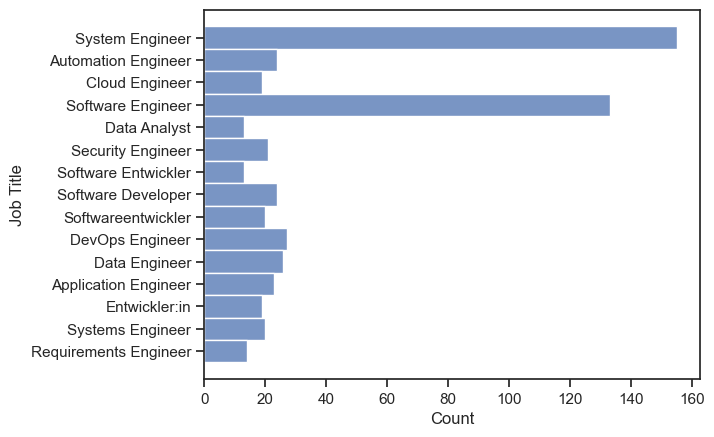

In [42]:
sns.set_theme(style="ticks")
job_counts = df_small['job_title_cleaned'].value_counts()
sns.histplot(data = df_small[df_small['job_title_cleaned'].isin(job_counts.nlargest(15).index)], y = "job_title_cleaned")
plt.xlabel('Count')
plt.ylabel('Job Title')


Text(0, 0.5, '')

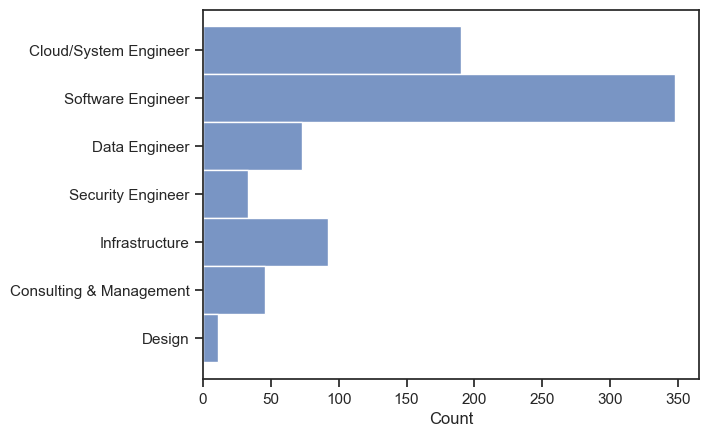

In [43]:

sns.histplot(data = df_small, y = "job_category")
plt.xlabel('Count')
plt.ylabel('')
#plt.savefig("../plots/job_categories.png", bbox_inches='tight')

## Workplace

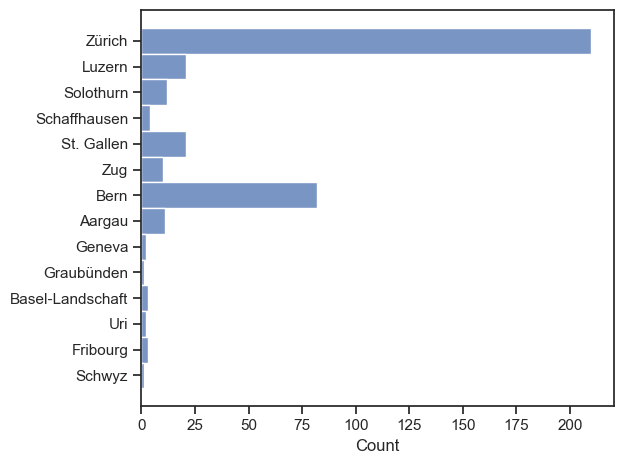

In [44]:
sns.histplot(data = df_small, y = "canton")
plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
#plt.savefig("../plots/job_locations.png", bbox_inches='tight')

## Employer

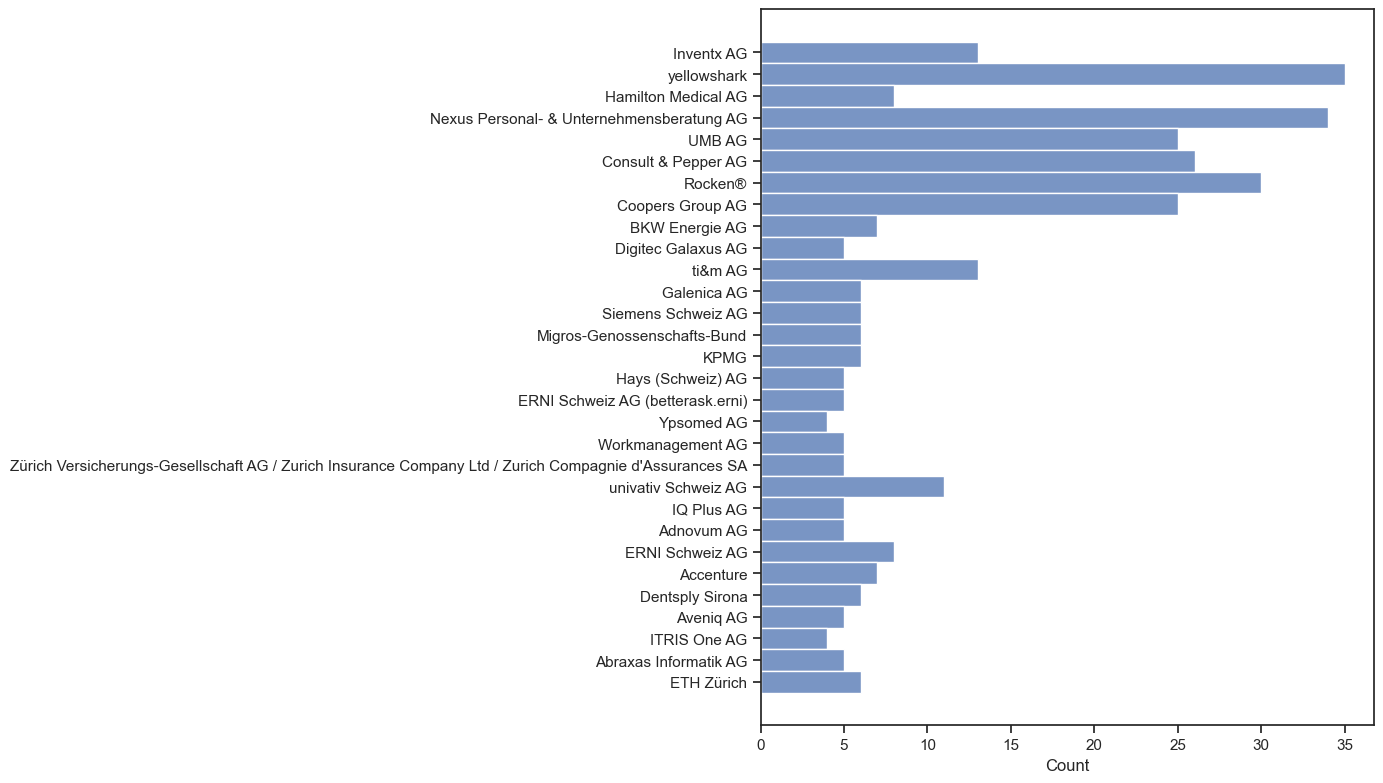

In [45]:
company_counts = df_small['company'].value_counts()
company_hist_df = df_small[df_small['company'].isin(company_counts.nlargest(30).index)]
plt.figure(figsize=(14, 8))
sns.histplot(data =company_hist_df, y = "company")

plt.xlabel('Count')
plt.ylabel('')
plt.tight_layout()
#plt.savefig("../plots/job_companies.png")

## Job Level

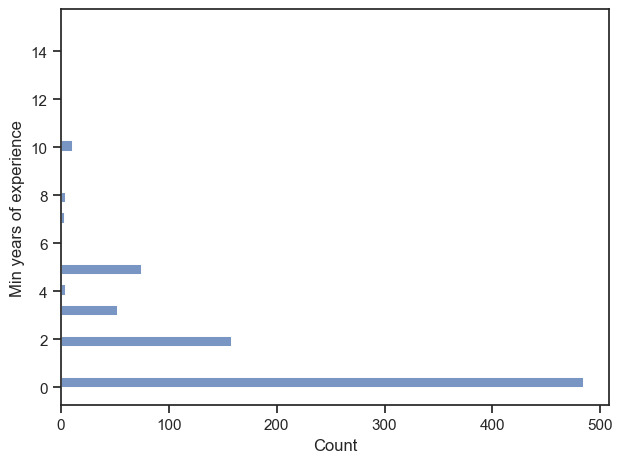

In [46]:
sns.histplot(data =df_small, y = "max_years")
plt.xlabel('Count')
plt.ylabel('Min years of experience')
plt.tight_layout()
#plt.savefig("../plots/histogram_max_years.png")

Text(0, 0.5, '')

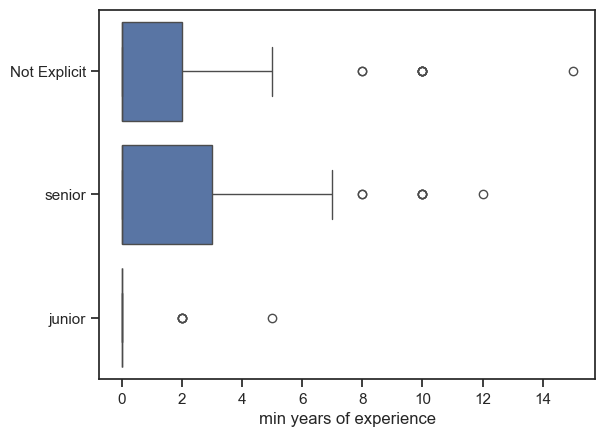

In [47]:
sns.boxplot(data =df_small, x = "max_years", y="career_stage_cleaned")

plt.xlabel('min years of experience')
plt.ylabel('')
#plt.savefig("../plots/seniority.png", bbox_inches='tight')

In [48]:
df_small.groupby(["career_stage_cleaned" ])["max_years"].describe()

,count,mean,std,min,25%,50%,75%,max
career_stage_cleaned,,,,,,,,
Not Explicit,598.0,1.192308,1.933953,0.0,0.0,0.0,2.0,15.0
junior,26.0,0.500000,1.174734,0.0,0.0,0.0,0.0,5.0
senior,169.0,1.887574,2.555181,0.0,0.0,0.0,3.0,12.0


## Time

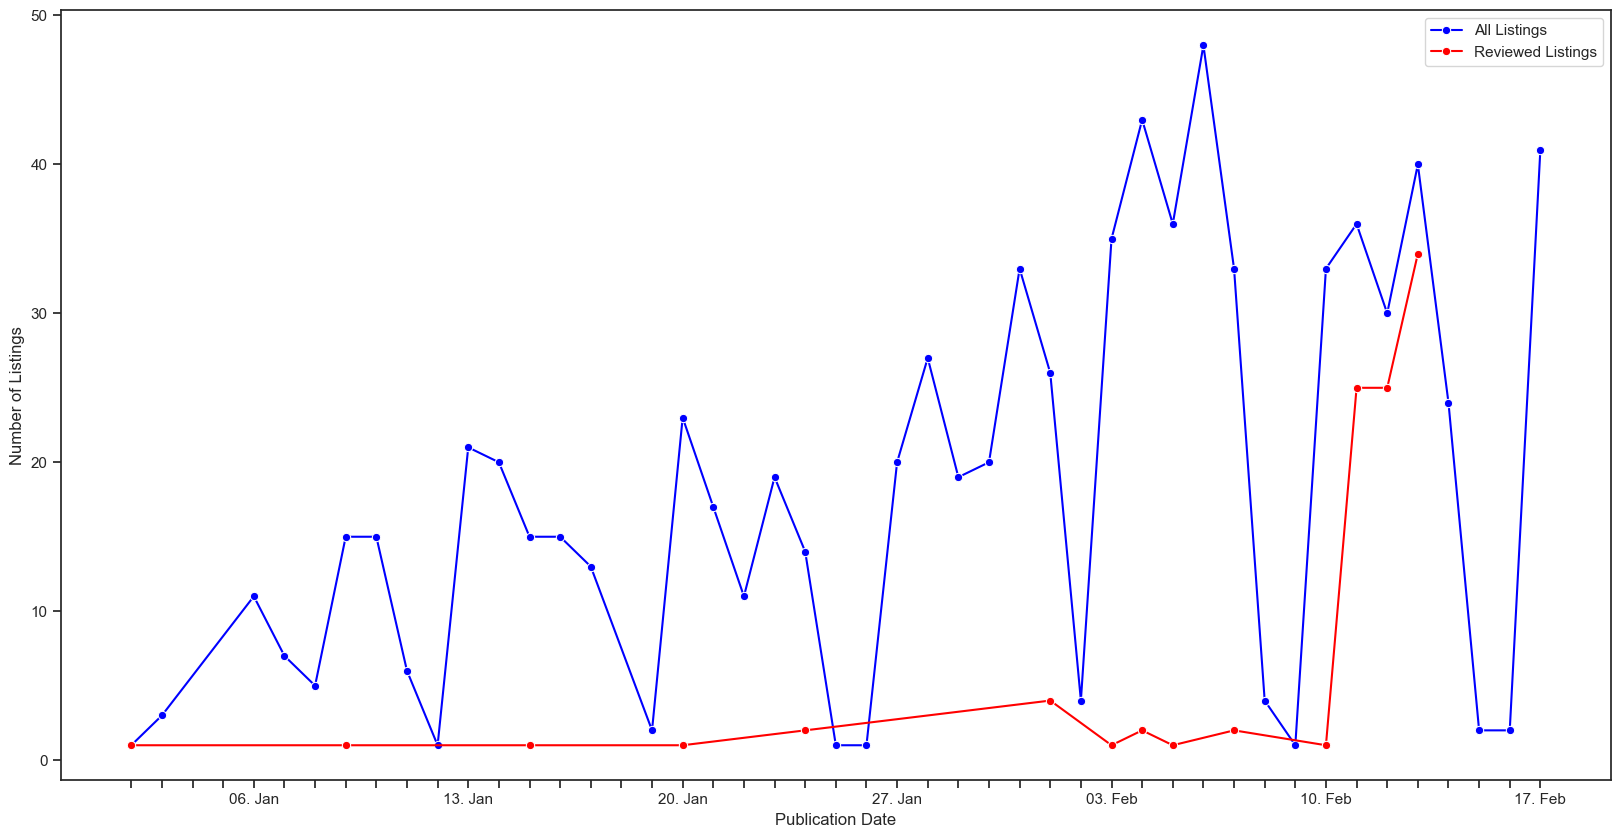

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group all data by date (ignoring reviewed status)
df_total = df_small.groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_total['publication_date'] = df_total['publication_date'].dt.start_time  # Convert period back to datetime

# Group reviewed data separately
df_reviewed = df_small[df_small['reviewed'] == True].groupby(df_small['publication_date'].dt.to_period('D')).size().reset_index(name='count')
df_reviewed['publication_date'] = df_reviewed['publication_date'].dt.start_time  # Convert period back to datetime

# Create the plot
plt.figure(figsize=(20, 10))

# Plot all listings (not reviewed) in blue
sns.lineplot(data=df_total, x='publication_date', y='count', label="All Listings", color='blue', marker="o")

# Plot reviewed listings in red (will only show points where reviewed=True)
sns.lineplot(data=df_reviewed, x='publication_date', y='count', label="Reviewed Listings", color='red', marker="o")

# Set x-ticks with only Monday labels
date_range = pd.date_range(df_total['publication_date'].min(), df_total['publication_date'].max(), freq='D')

plt.xticks(
    ticks=date_range,
    labels=['' if d.weekday() != 0 else d.strftime('%d. %b') for d in date_range],
    rotation=0
)

plt.xlabel('Publication Date')
plt.ylabel('Number of Listings')

# Add a legend
plt.legend()

# Save and show the plot
plt.savefig("../plots/time.png", bbox_inches='tight')
plt.show()


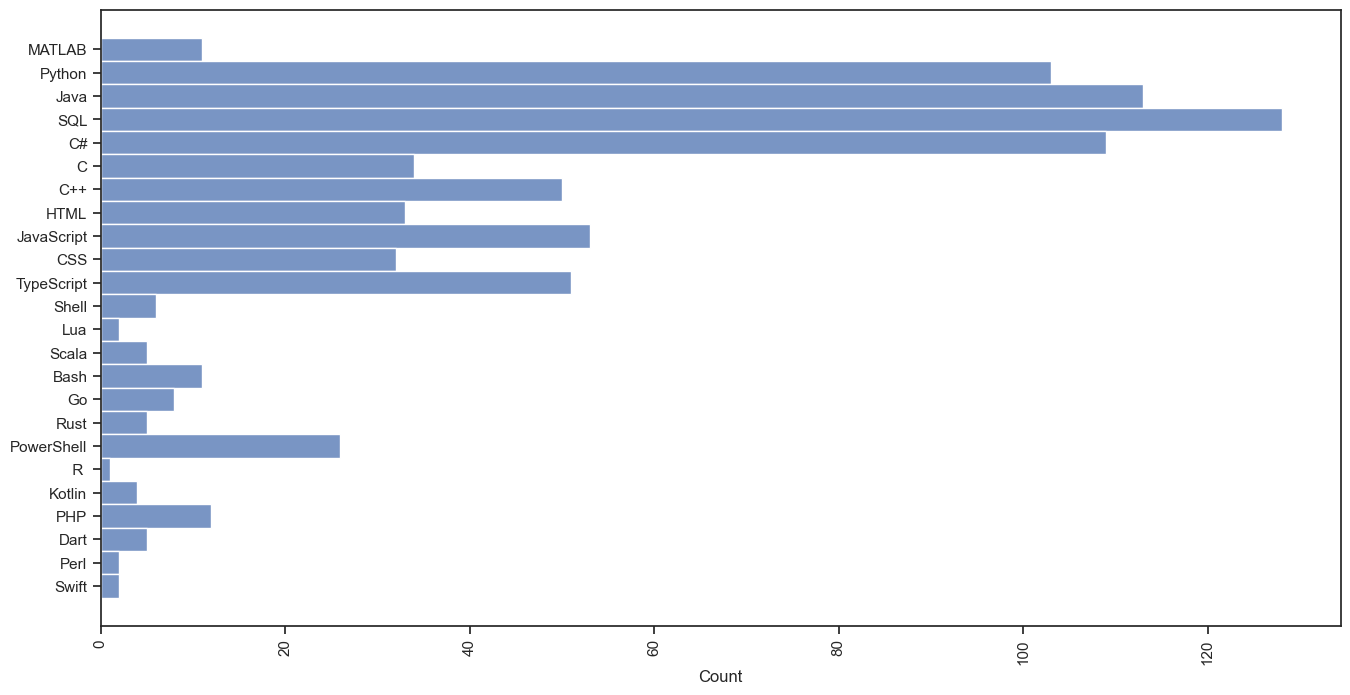

In [50]:
flat_list = [item for sublist in df_small["programming_languages"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)
plt.xticks(rotation=90)


#plt.savefig("../plots/languages.png", bbox_inches='tight')

plt.show()


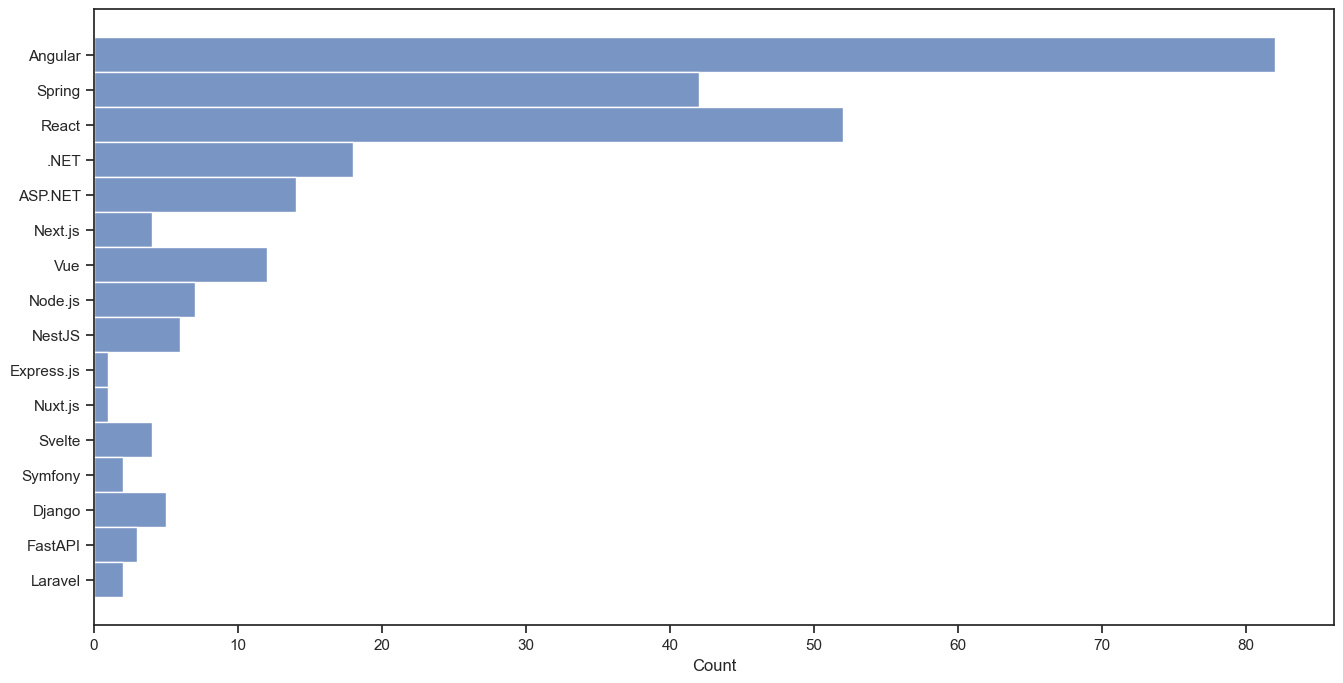

In [51]:
## Frameworks
flat_list = [item for sublist in df_small["frameworks"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, bins=10)


#plt.savefig("../plots/frameworks.png", bbox_inches='tight')
plt.show()


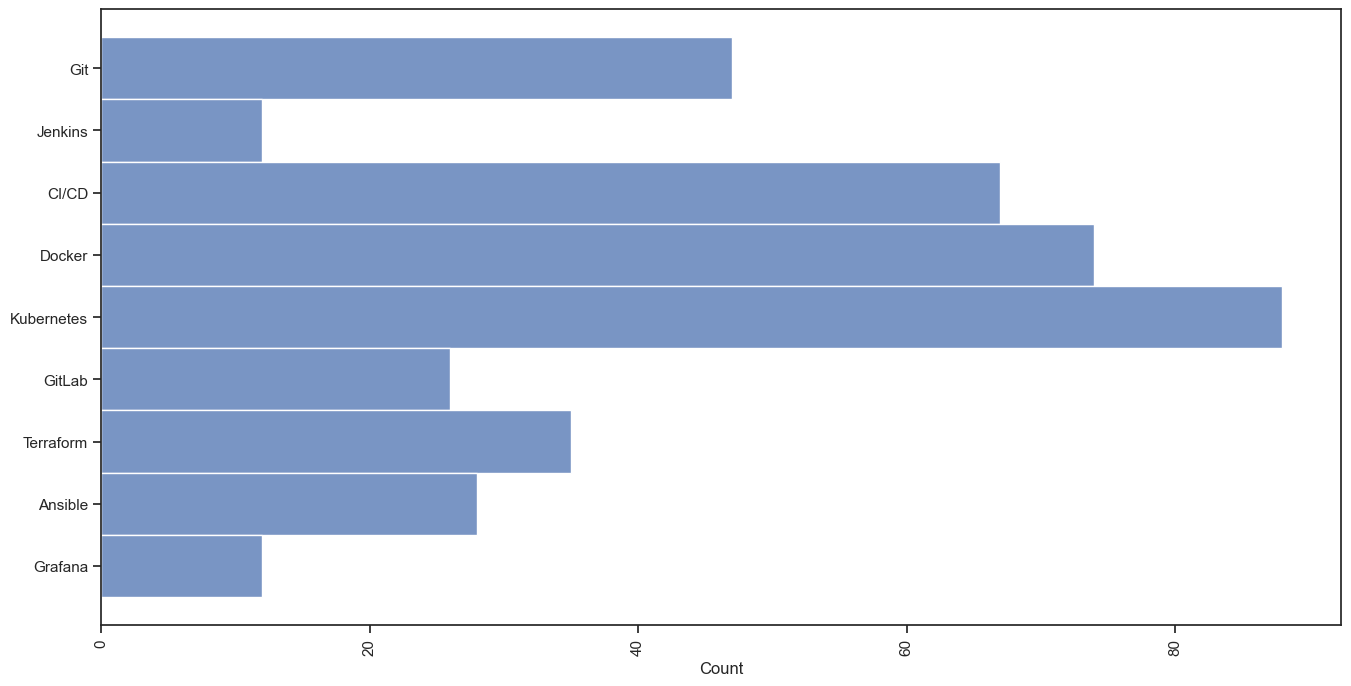

In [52]:
## Tools
flat_list = [item for sublist in df_small["tools"] for item in sublist]
plt.figure(figsize=(16, 8))
sns.histplot(y = flat_list, kde=False, bins=10)
plt.xticks(rotation=90)
#plt.savefig("../plots/tools.png", bbox_inches='tight')
plt.show()


In [53]:

flat_list = [item for sublist in df_small["operating_systems"] for item in sublist]
plt.figure(figsize=(16, 8))
#sns.histplot(y = flat_list, bins=10)

plt.show()

<Figure size 1600x800 with 0 Axes>

## My Interests

In [54]:
df_good = df_small[df_small['job_category'].isin(['Software Engineer', 'Data Engineer', 'Design'])]
df_good = df_good[
    (df_good['max_years'] <= 2) | 
    (df_good['programming_languages'].apply(lambda x: "Python" in x)) | 
    (df_good['job_category'] == 'Data Engineer')
]
df_good = df_good[df_good['canton'].isin(["Zürich"])]
df_good = df_good[df_good['career_stage_cleaned']!= "senior"]
df_good = df_good[df_good['publication_date']>='2025-02-01']
df_good.sort_values('publication_date')

,company,contract_type,descriptions,downloaded,job_title,language,place_of_work,publication_date,rating,reviewed,...,canton,programming_languages,frameworks,tools,operating_systems,years,education,job_title_cleaned,job_category,max_years
727,Nexus Personal- & Unternehmensberatung AG,None,[{'1': []}],True,Junior Webapplikationsentwickler (a) für abwec...,None,Stadt Zürich,2025-02-01,NaN,NaN,...,Zürich,[],[],[],[],[],[],Applikationsentwickler,Software Engineer,0
1093,Adnovum AG,None,[{'1': []}],True,Android Software Engineer,None,Zürich,2025-02-01,NaN,NaN,...,Zürich,[],[],[],[],[],[],Software Engineer,Software Engineer,0
2412,yellowshark,Unlimited employment,[],True,Software Entwickler Java (w/m) 80-100%,"German (Fluent), English (Fluent)",Zürich,2025-02-03,NaN,NaN,...,Zürich,[],[],[],[],[],[],Software Entwickler,Software Engineer,0
1310,Supercomputing Systems AG,Unlimited employment,"[{'0': ['Softwareentwicklung', 'Softwaredesign...",True,Software Developer für ein dynamisches Scrum-T...,German (Fluent),"Technoparkstrasse 1, 8005 Zürich",2025-02-03,NaN,NaN,...,Zürich,[Java],[],"[CI/CD, Docker, Kubernetes]",[Linux],[],[],Software Developer,Software Engineer,0
1408,PackSys Global AG,Unlimited employment,"[{'0': ['Du entwickelst, simulierst und testes...",True,Automation Software Engineer,"German (Fluent), English (Fluent)","Spitalstrasse 38, 8630 Rüti ZH",2025-02-03,1.0,1.0,...,Zürich,[],[],[],[],[],[],Software Engineer,Software Engineer,0
722,exedra ag Zürich,Unlimited employment,[{'0': ['Durchführung detaillierter Analysen u...,True,Performance Data Analyst,German (Intermediate),8001 Zürich,2025-02-04,NaN,NaN,...,Zürich,[],[],[],[],[2],[Vocational],Data Analyst,Data Engineer,2
3082,ti&m AG,Unlimited employment,[{'0': ['Spannende und innovative Datenprojekt...,True,Data Architect,"German (Fluent), English (Fluent)","Buckhauserstrasse 24, 8048 Zürich",2025-02-04,NaN,NaN,...,Zürich,"[Python, SQL]",[],[],[],[8],[],Data Architect,Data Engineer,8
3409,PRODYNA (Schweiz) AG,Unlimited employment,[{'0': ['Du entwickelst cloudfähige Softwarelö...,True,Full Stack Software Engineer (m/w/d),"German (Fluent), English (Intermediate)","Basel, Zürich oder Bern",2025-02-05,NaN,NaN,...,Zürich,"[C#, Go, Java, TypeScript]","[Angular, React, Spring]",[Kubernetes],[],[],[],Software Engineer,Software Engineer,0
2868,Accenture,Unlimited employment,"[{'0': ['You'll engineer future-proof, high-qu...",True,"Frontend Engineer (part-time possible, all gen...",English (Fluent),Basel|Bern|Genf|Lugano|Zürich,2025-02-05,NaN,NaN,...,Zürich,"[Java, JavaScript]","[Angular, React]",[CI/CD],[],[2],[],Frontend Engineer,Software Engineer,2
2460,Zürich Versicherungs-Gesellschaft AG / Zurich ...,Unlimited employment,[{'0': ['Du arbeitest in datenfokussierten Pro...,True,Business & Data Analyst im Versicherungsumfeld...,None,"Hagenholzstrasse 60, 8050 CH - Zürich",2025-02-05,NaN,NaN,...,Zürich,[SQL],[],[],[],[5],"[Bachelor, Vocational]",Data Analyst,Data Engineer,5


In [55]:
for _, row in df_good.sort_values('publication_date').iterrows():

    print(f'{row.job_title}: {row.url} , {row.company}' )

Junior Webapplikationsentwickler (a) für abwechslungreiche Kundenprojekte: https://www.itjobs.ch/jobs/junior-webapplikationsentwickler-a-fur-abwechslungreiche-kundenprojekte/111820/ , Nexus Personal- & Unternehmensberatung AG
Android Software Engineer: https://www.itjobs.ch/jobs/android-software-engineer/116805/ , Adnovum AG
Software Entwickler Java (w/m) 80-100%: https://www.jobs.ch/en/vacancies/detail/f32dcbca-7eda-4e5b-a322-48cf6725bf2e/ , yellowshark
Software Developer für ein dynamisches Scrum-Team (m/w/d): https://www.jobs.ch/en/vacancies/detail/c3ef0a23-8922-477d-9443-54b74c04e7ec/ , Supercomputing Systems AG
Automation Software Engineer: https://www.jobs.ch/en/vacancies/detail/1277f0a7-f931-4594-a7de-2cd2e36cade2/ , PackSys Global AG
Performance Data Analyst: https://www.jobs.ch/en/vacancies/detail/ef6284e8-e5d0-4653-954d-cc8a933016d8/ , exedra ag Zürich
Data Architect: https://www.jobs.ch/en/vacancies/detail/831a204f-fcd9-4193-a2bd-b3e7d3761c29/ , ti&m AG
Full Stack Software E

<Axes: xlabel='Count', ylabel='company'>

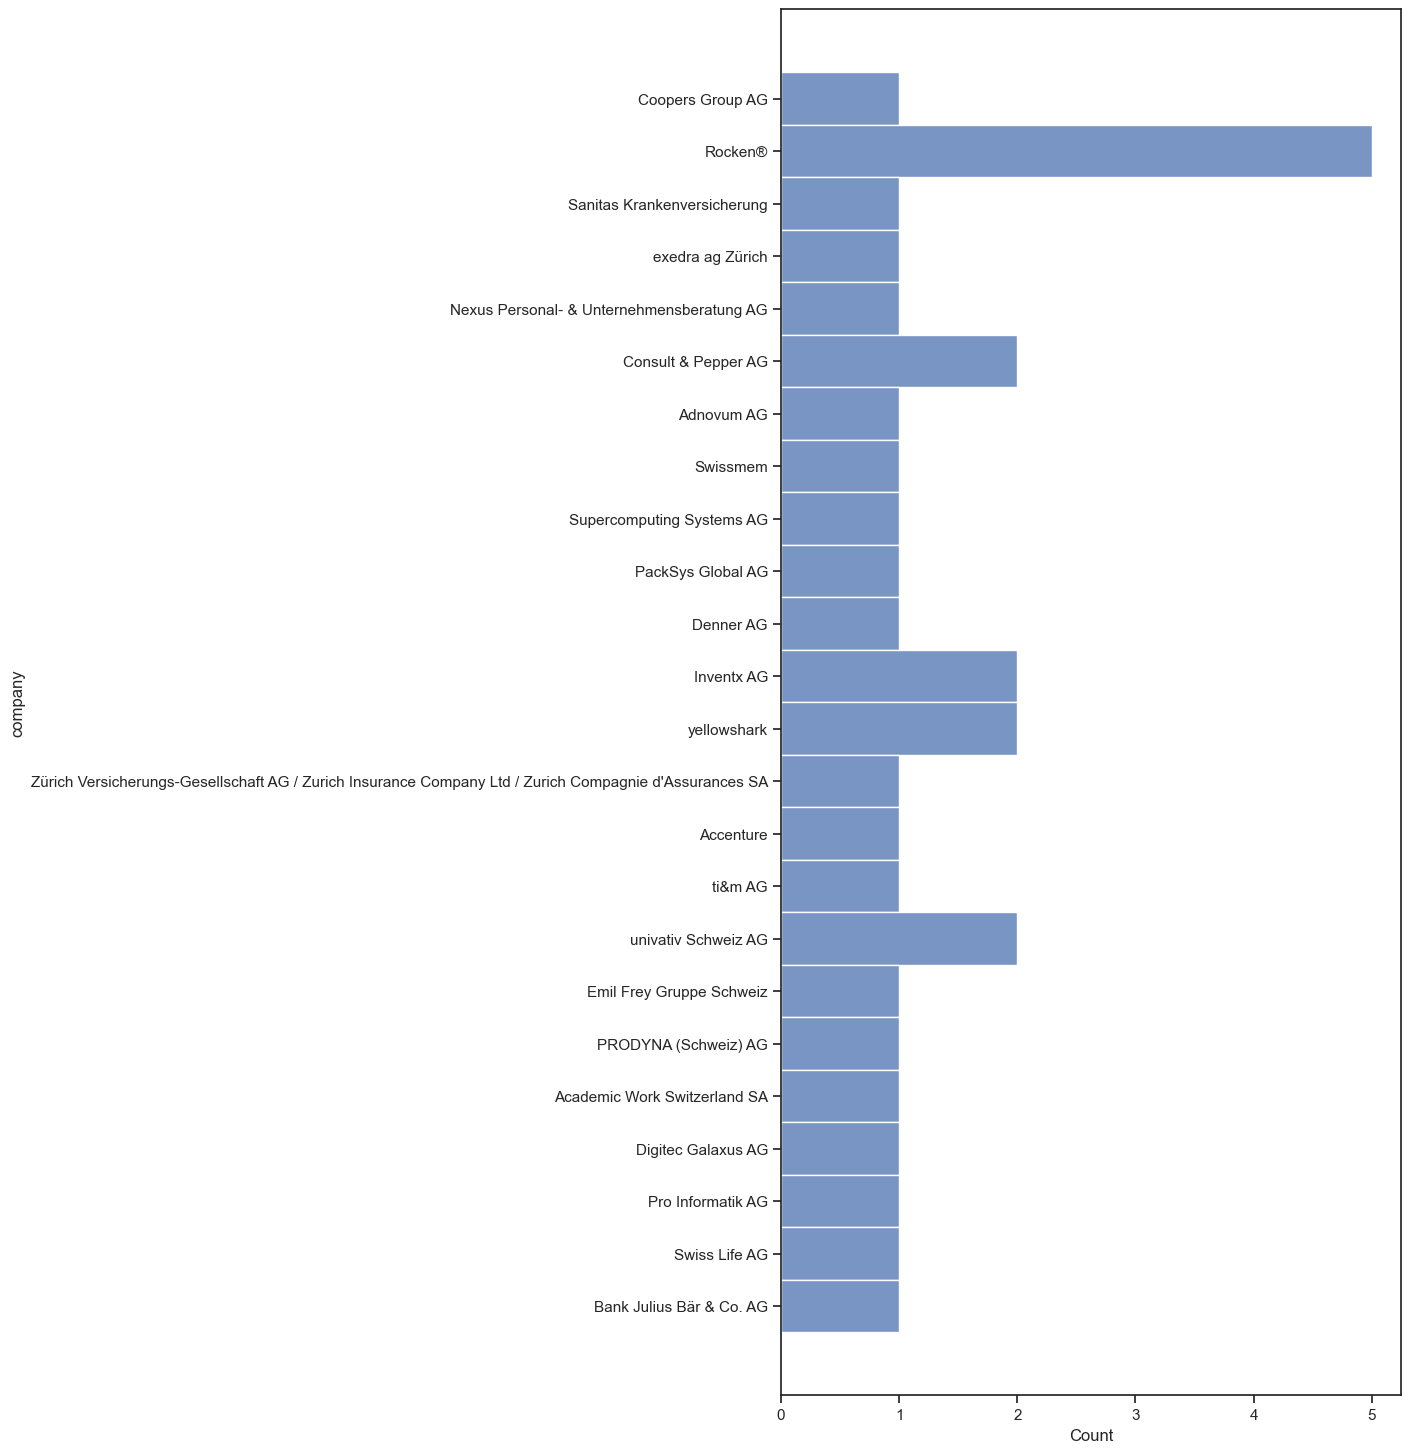

In [56]:

plt.figure(figsize=(8, 18))
sns.histplot(data =df_good, y = "company")